# Boundaries

## Imports

In [1]:
import slhfdtd
from matplotlib import pyplot as plt
from matplotlib import patches

## Global Configurations

In [2]:
plt.rcParams.update({"text.usetex" : True})

## 2D
### Half-Reflective (Default) Boundary Conditions

(<Figure size 504x216 with 4 Axes>,
 array([<AxesSubplot:title={'center':'$\\|\\,\\mathbf{E}\\,\\|$'}, xlabel='$x(\\mathrm{m})$', ylabel='$y(\\mathrm{m})$'>,
        <AxesSubplot:title={'center':'$\\|\\,\\mathbf{H}\\,\\|$'}, xlabel='$x(\\mathrm{m})$', ylabel='$y(\\mathrm{m})$'>],
       dtype=object))

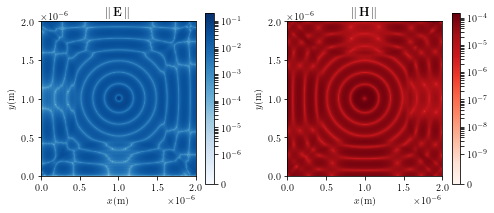

In [3]:
solver = slhfdtd.Solver((2e-6, 2e-6, 0))
solver.add_source(slhfdtd.PointSource((1e-6, 1e-6, 0)))
solver.run(5e-15)

visualizer = slhfdtd.Visualizer(solver)
visualizer.set_variables(fields=('E', 'H'), norms='log')
visualizer.set_aspect('equal')
visualizer.set_figsize((7, 3))
visualizer.plot2d_magnitude()

# plt.savefig('half-reflective-2d.pdf', bbox_inches='tight')

### Reflective Boundary Conditions

(<Figure size 504x216 with 4 Axes>,
 array([<AxesSubplot:title={'center':'$\\|\\,\\mathbf{E}\\,\\|$'}, xlabel='$x(\\mathrm{m})$', ylabel='$y(\\mathrm{m})$'>,
        <AxesSubplot:title={'center':'$\\|\\,\\mathbf{H}\\,\\|$'}, xlabel='$x(\\mathrm{m})$', ylabel='$y(\\mathrm{m})$'>],
       dtype=object))

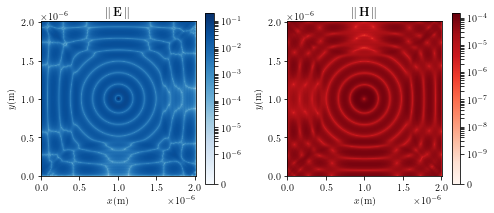

In [4]:
solver = slhfdtd.Solver((2.01e-6, 2.01e-6, 0))
solver.add_boundary(slhfdtd.AutoReflector())
solver.add_source(slhfdtd.PointSource((1e-6, 1e-6, 0)))
solver.run(5e-15)

visualizer = slhfdtd.Visualizer(solver)
visualizer.set_variables(fields=('E', 'H'), norms='log')
visualizer.set_aspect('equal')
visualizer.set_figsize((7, 3))
visualizer.plot2d_magnitude()

# plt.savefig('reflective-2d.pdf', bbox_inches='tight')

### Perfectly Matched Layer (PML)

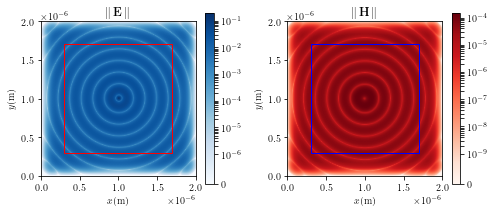

In [5]:
solver = slhfdtd.Solver((2e-6, 2e-6, 0))
solver.add_source(slhfdtd.PointSource((1e-6, 1e-6, 0)))
boundary = slhfdtd.AutoPML()
solver.add_boundary(boundary)
solver.run(5e-15)

visualizer = slhfdtd.Visualizer(solver)
visualizer.set_pos(crop_boundaries=False)
visualizer.set_variables(fields=('E', 'H'), norms='log')
visualizer.set_aspect('equal')
visualizer.set_figsize((7, 3))
fig, axs = visualizer.plot2d_magnitude()

bb, be = boundary.begin_bound, boundary.end_bound
axs[0].add_patch(patches.Rectangle(
    (bb[0], bb[1]), be[0] - bb[0], be[1] - bb[1], fill=False, color='red'
))
axs[1].add_patch(patches.Rectangle(
    (bb[0], bb[1]), be[0] - bb[0], be[1] - bb[1], fill=False, color='blue'
))

# plt.savefig('pml-2d.pdf', bbox_inches='tight')

## 1D
### Half-Reflective (Default) Boundary Conditions

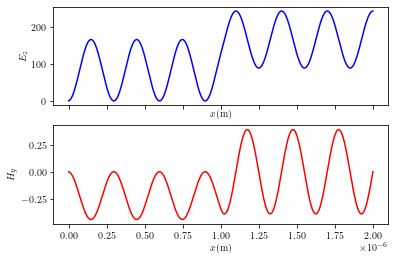

In [6]:
fig, axs = plt.subplots(2, sharex=True)

solver = slhfdtd.Solver((2e-6, 0, 0), grid_dist=1e-9)
solver.add_source(slhfdtd.PointSource((0, 0, 0)))
solver.run(1e-14)

visualizer = slhfdtd.Visualizer(solver)
visualizer.plot1d_field(axs[0], 'E')
visualizer.plot1d_field(axs[1], 'H', axis_field=1)

# plt.savefig('half-reflective-1d.pdf', bbox_inches='tight')

### Reflective Boundary Conditions

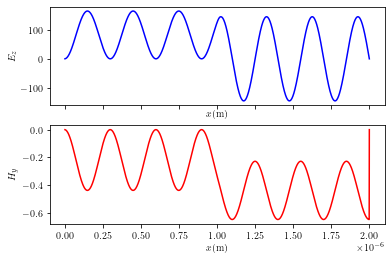

In [7]:
fig, axs = plt.subplots(2, sharex=True)

solver = slhfdtd.Solver((2e-6, 0, 0), grid_dist=1e-9)
solver.add_boundary(slhfdtd.AutoReflector())
solver.add_source(slhfdtd.PointSource((0, 0, 0)))
solver.boundaries.pop(0)
solver.run(1e-14)

visualizer = slhfdtd.Visualizer(solver)
visualizer.plot1d_field(axs[0], 'E')
visualizer.plot1d_field(axs[1], 'H', axis_field=1)

# plt.savefig('reflective-1d.pdf', bbox_inches='tight')

### Exact 1D Absorbing Boundary Conditions (ABC)

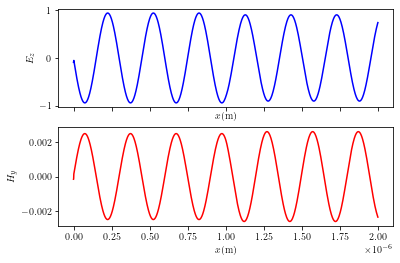

In [8]:
fig, axs = plt.subplots(2, sharex=True)

solver = slhfdtd.Solver((2e-6, 0, 0), grid_dist=1e-9)
solver.add_boundary(slhfdtd.Exact1DAbsorber(0))
solver.add_source(slhfdtd.PointSource((2e-9, 0, 0)))
solver.run(1e-14)

visualizer = slhfdtd.Visualizer(solver)
visualizer.plot1d_field(axs[0], 'E')
visualizer.plot1d_field(axs[1], 'H', axis_field=1)

# plt.savefig('exact-1d.pdf', bbox_inches='tight')

### Perfectly Matched Layer (PML)

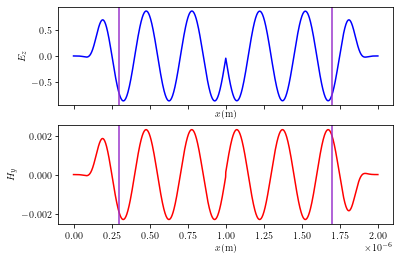

In [9]:
fig, axs = plt.subplots(2, sharex=True)

solver = slhfdtd.Solver((2e-6, 0, 0), grid_dist=1e-9)
solver.add_source(slhfdtd.PointSource((1e-6, 0, 0)))
boundary = slhfdtd.AutoPML()
solver.add_boundary(boundary)
solver.run(1e-14)

visualizer = slhfdtd.Visualizer(solver)
visualizer.set_pos(crop_boundaries=False)
visualizer.plot1d_field(axs[0], 'E')
visualizer.plot1d_field(axs[1], 'H', axis_field=1)

axs[0].axvline(boundary.begin_bound[0], color='darkorchid')
axs[1].axvline(boundary.begin_bound[0], color='darkorchid')
axs[0].axvline(boundary.end_bound[0], color='darkorchid')
axs[1].axvline(boundary.end_bound[0], color='darkorchid')

# plt.savefig('pml-1d.pdf', bbox_inches='tight')